In [1]:
###  Decision Tree Regressor Implementation

In [2]:
import pandas as pd
import matplotlib .pyplot as plt
%matplotlib inline

In [4]:
## california House Pricing fata set
from sklearn.datasets import fetch_california_housing
california_df=fetch_california_housing()

In [5]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [18]:
df=pd.DataFrame(california_df.data, columns=california_df.feature_names)
df['Target']=california_df.target

## TAking sample data 
df=df.sample(frac=0.25)
print(df.shape)
## Independent feature
X=df.iloc[:,:-1]
## Dependent feature
y=df.iloc[:,-1]

(5160, 9)


In [19]:
### TRain Test sPlit

from sklearn.model_selection import train_test_split
X_train, X_test, y_trin, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [20]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [21]:
regressor.fit(X_train,y_trin)

DecisionTreeRegressor()

In [22]:
y_pred=regressor.predict(X_test)

In [23]:
y_pred

array([1.667, 1.577, 2.082, ..., 1.56 , 2.346, 2.158])

In [24]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [25]:
score

0.4681360072027506

In [26]:
## Hyperparameter tunning
parameter={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 
    'splitter':['best','random'], 
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features':['auto','sqrt','lod2']
}


In [31]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter, cv=2, scoring='neg_mean_squared_error')

In [34]:
regressorcv.fit(X_train,y_trin)

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'lod2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [35]:
regressorcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [40]:
regressor=DecisionTreeRegressor(criterion='squared_error',max_depth= 9, max_features= 'sqrt',splitter= 'best')

regressor.fit(X_train,y_trin)

DecisionTreeRegressor(max_depth=9, max_features='sqrt')

In [43]:
%matplotlib inline

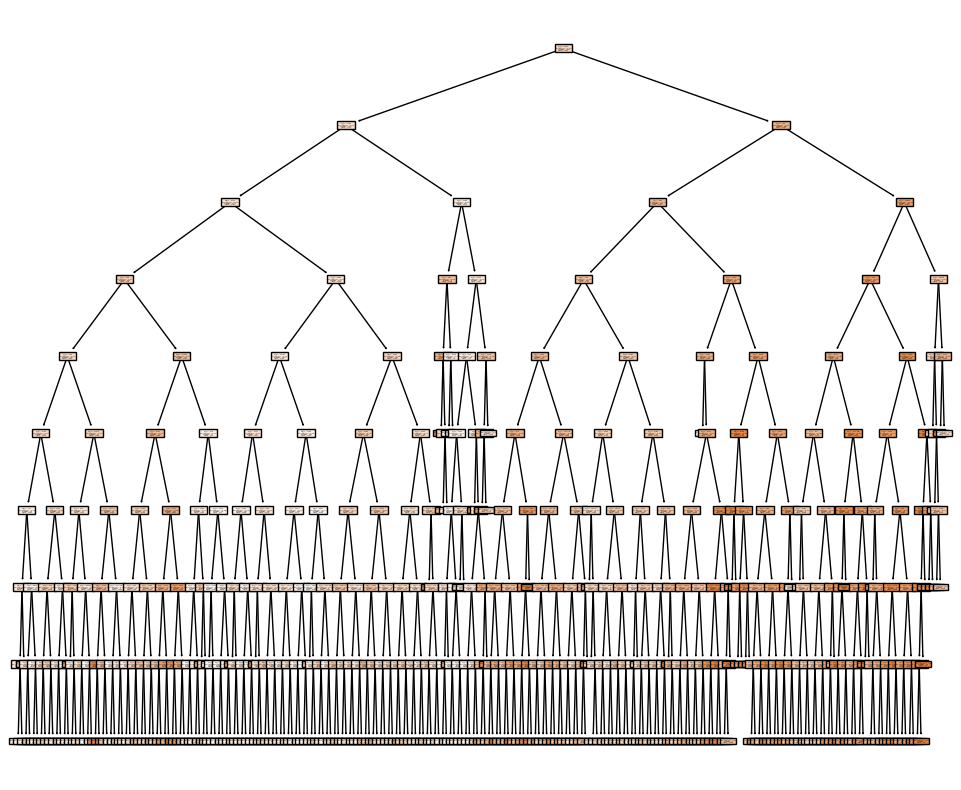

In [45]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(regressor,filled=True)
plt.show()

In [36]:
y_pred=regressorcv.predict(X_test)

In [46]:
r2_score(y_pred,y_test)

0.3936494140374892